In [17]:
# Import packages
import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt

# Empirical analytical  sea ice growth model
Following Climate System Modelling, Kevin E. Trenberth Chapter - W.D. Hibler and G. M. Flato: Sea ice models.

We first define a degree day, $\theta(t)$ where:
$$ \theta(t) = \int_0^t (T_f-T_a)dt $$
and $T_f$ is the freezing temperature of sea water, and $T_a$ is the air temperature. The bottom temperature of the ice $T_B$ is usually taken as being the same as $T_f$. A good empirical approximation to ice thickness, $H$, as a function of degree days based on data analysis, is given by Anderson (1961):
$$H^2 + 5.1H = 6.7\theta$$
where $H$ is in cm and $\theta$ has units of $^{\circ}C$ day.

In [8]:
# Parameters
# Model timestep
dt = 1.0 # days
# Freezing temperature of sea water
T_f = -1.8 #° C

# Initial air temperature
T_a = -10.0 #° C

theta_t = (T_f - T_a)*dt
theta_t

H^2 + 5.1H = 6.7*theta_t

SyntaxError: invalid decimal literal (2275531989.py, line 13)

In [44]:
def ice_thickness_per_degree_day(H, H_s):
    return H + 12.9/(2*H + 13.1*H_s + 16.8)

def empirical_model(H_0, H_s, theta_t_max):
    H = np.zeros(theta_t_max)
    # Initialisation
    H[0] = ice_thickness_per_degree_day(H_0, H_s)
    for t in range(theta_t_max-1):
        H[t+1] = ice_thickness_per_degree_day(H[t], H_s)
    return H
# Parameters and initialisation
H_s = 5
H_0 = 0 # cm
theta_t_max = 2000 # Maximum degree days




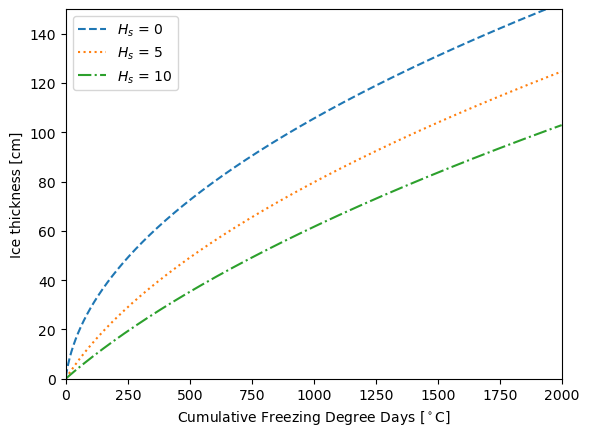

In [54]:
H_s_0 = empirical_model(H_0, 0, theta_t_max)
H_s_5 = empirical_model(H_0, 5, theta_t_max)
H_s_10 = empirical_model(H_0, 10, theta_t_max)
plt.plot(range(theta_t_max), H_s_0, label=f'$H_s$ = {0}', linestyle='--')
plt.plot(range(theta_t_max), H_s_5, label=f'$H_s$ = {5}', linestyle=':')
plt.plot(range(theta_t_max), H_s_10, label=f'$H_s$ = {10}', linestyle='-.')
plt.xlabel('Cumulative Freezing Degree Days [$^\circ$C]')
plt.ylabel('Ice thickness [cm]')
plt.xlim((0,2000))
plt.ylim((0,150))
plt.legend()

From the result it is evident that the growth slows down drastically once the ice gets thicker than about 20 cm.

Adding some simple thermodynamics.

In [ ]:
def simple_thermodynamic_model(H_0, H_s, theta_t_max):
    dH_dt = (gamma*(T_B - T_0) - F_w)/(rho_i*L)

# UW – Climate Modeling ATMS/ESS 559 OCN 558

$$ c \frac{dT}{dt} = -\beta T - \gamma (T-T_0) + \mathcal{F}(t) $$
$$ c_0 \frac{dT_0}{dt} = \gamma (T-T_0) $$

In [163]:
# Parameters

specificHeat = 3985 # J/kg/C
mixedLayerDepth = 50 # m
deepOceanDepth = 4000 # m
rho_ocean = 1025 # kg m^-3

# Heat capacity for mixed-layer ocean
c = mixedLayerDepth * rho_ocean * specificHeat

# Heat capacity for deep ocean
c_0 = deepOceanDepth * rho_ocean * specificHeat


In [200]:
# Model
def update_mixed_layer(T, T_0, F):
    dT_dt = (-beta*T - gamma*(T-T_0) + F)/c
    return T + dT_dt/dt

def update_deep_ocean(T, T_0):
    dT_0_dt = gamma*(T-T_0)/c_0
    return T_0 + dT_0_dt/dt

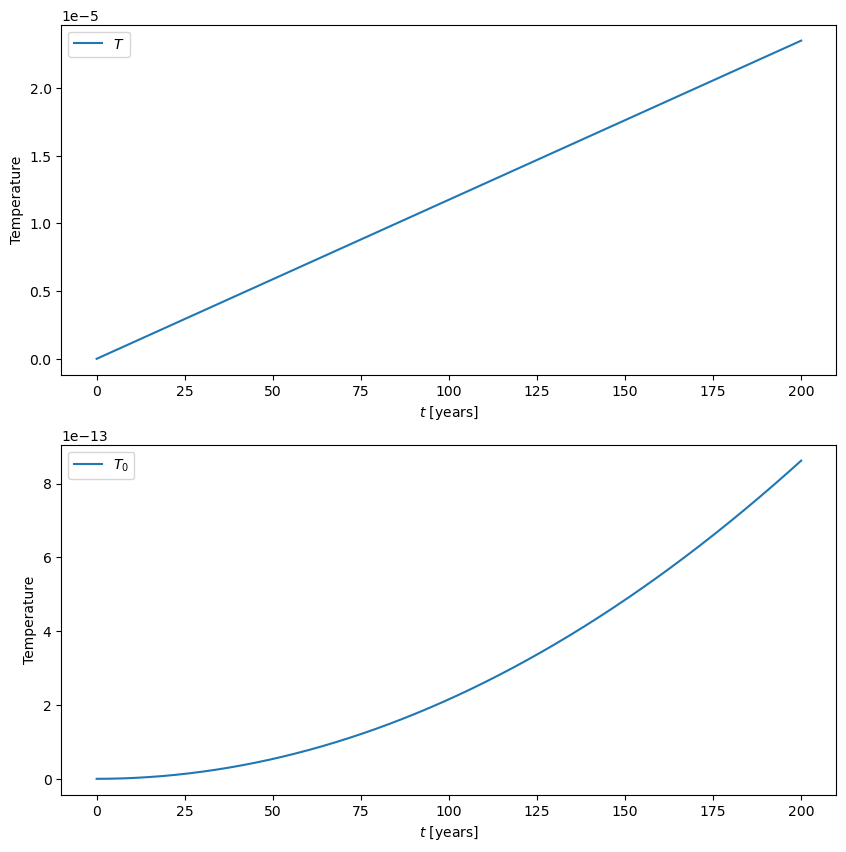

In [223]:
# Case 1: Linear forcing

t = 0.0 # model time
max_t = 200 # years
dt = 1/12 # one month in years
max_timesteps = int(np.round(max_t/dt))


beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1

Forcing = np.full(max_timesteps, 2) # W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]
    #F = np.random.normal(0, 1, 1)

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    # Update MLD temperature
    Temp[timestep+1] = update_mixed_layer(T, T_0, F)

    # Update deep ocean
    T = Temp[timestep]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

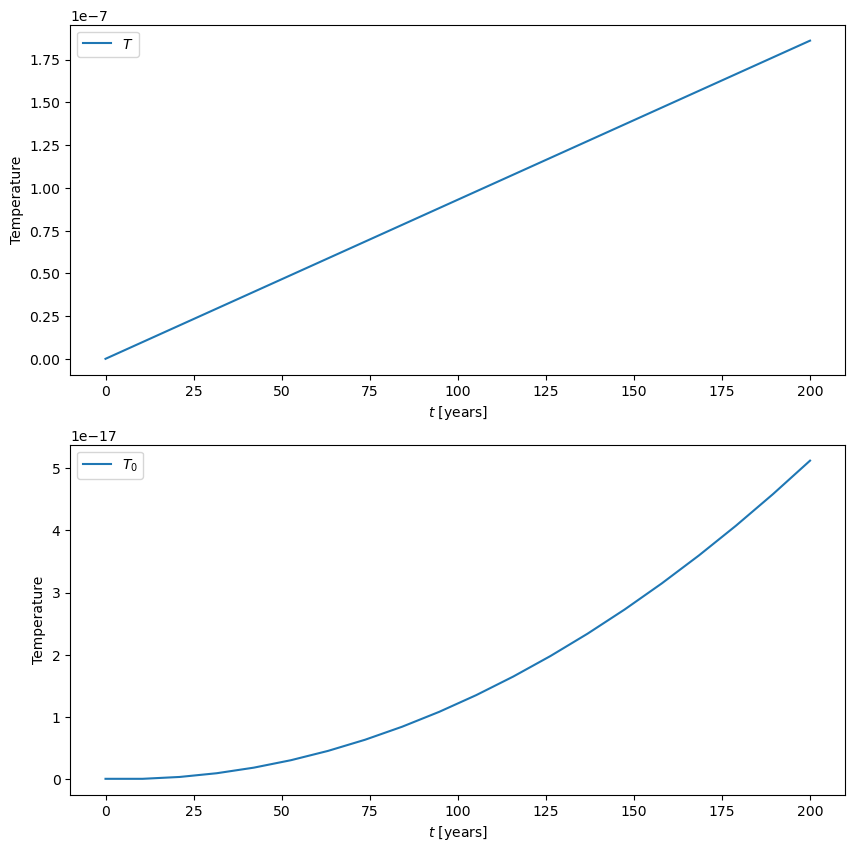

In [225]:
# Case 2: Numerically unstable

t = 0.0 # model time
max_t = 200 # years
dt = 10#1/12 # one month in years
max_timesteps = int(np.round(max_t/dt))


beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1

Forcing = np.full(max_timesteps, 2) # W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]
    #F = np.random.normal(0, 1, 1)

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    Temp[timestep+1] = update_mixed_layer(T, T_0, F)

    T = Temp[timestep]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()

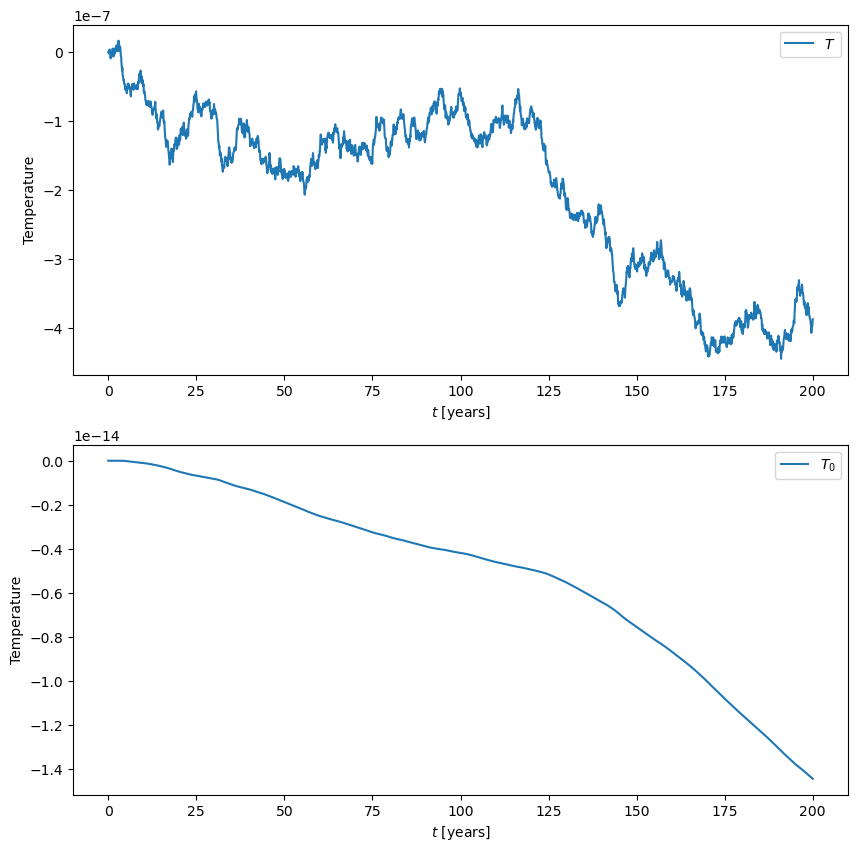

In [217]:
# Case 3: Noisy forcing

t = 0.0 # model time
max_t = 200 # years
dt = 1/12 # one month in years
max_timesteps = int(np.round(max_t/dt))


beta = 1.2 # W m^-2 K^-1
gamma = 0.5 # W m^-2 K^-1

Forcing = np.random.normal(0, 1, max_timesteps)# W m^-2
Temp = np.zeros(max_timesteps)
Temp_0 = np.zeros(max_timesteps)

# Initialise
Temp[0] = 0.0
Temp_0[0] = 0.0

for timestep in range(max_timesteps-1): 
    F = Forcing[timestep]

    T = Temp[timestep]
    T_0 = Temp_0[timestep]
    Temp[timestep+1] = update_mixed_layer(T, T_0, F)

    T = Temp[timestep+1]
    Temp_0[timestep+1] = update_deep_ocean(T, T_0)

    t += dt
    if t > max_t:
        print('Maximum time elapsed')
        break


fig = plt.figure(figsize=[10, 10])

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(np.linspace(0,max_t,max_timesteps), Temp, label='$T$')

ax1.set_xlabel('$t$ [years]')
ax1.set_ylabel('Temperature')
ax1.legend()

ax2.plot(np.linspace(0,max_t,max_timesteps), Temp_0, label='$T_0$')

ax2.set_xlabel('$t$ [years]')
ax2.set_ylabel('Temperature')
ax2.legend()